In [76]:
from datetime import datetime, timezone, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data = pd.read_excel('btc_future_brr.xlsx')
data = pd.read_csv('btc_future_brr.csv')


In [77]:
data = data.iloc[:,[1,2,-1]]
data.dropna(axis=0, inplace=True)

In [78]:
data

,Unnamed: 1,btc future last px,brr last px
1,05/20/2021,40320.0,41861.09
2,05/19/2021,39340.0,35734.10
3,05/18/2021,43150.0,43118.61
4,05/17/2021,44060.0,44384.66
8,05/14/2021,50190.0,50769.13
...,...,...,...
1345,02/15/2018,10090.0,9842.22
1346,02/14/2018,9290.0,9251.01
1347,02/13/2018,8700.0,8533.68
1348,2/12/2018,8860.0,8610.75


In [79]:
data.loc[:,'Date'] = pd.to_datetime(data.iloc[:,0])
data.loc[:,'btc future last px'] = data.loc[:,'btc future last px'].astype(float)
data.loc[:,'brr last px'] = data.loc[:,'brr last px'].astype(float)

In [80]:
data = data.loc[:,['Date', 'btc future last px', 'brr last px']]

In [81]:
btc_price = data.loc[:,'btc future last px']
brr_price = data.loc[:,'brr last px']

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


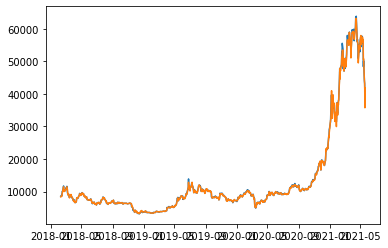

In [82]:
plt.plot(data.Date, btc_price)
plt.plot(data.Date, brr_price)

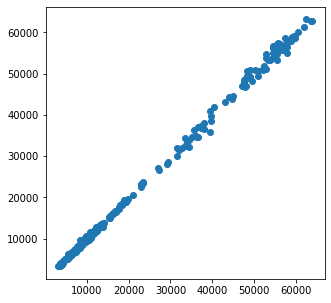

In [83]:
plt.figure(figsize=(5,5))
plt.scatter(btc_price, brr_price)

In [84]:
data.loc[:,'log return future'] = np.log(btc_price/btc_price.shift(-1))
data.loc[:,'log return bitcoin'] = np.log(brr_price/brr_price.shift(-1))

In [85]:
btc = data.loc[:,'log return future'] 
brr = data.loc[:,'log return bitcoin'] 

In [86]:
data

,Date,btc future last px,brr last px,log return future,log return bitcoin
1,2021-05-20,40320.0,41861.09,0.024606,0.158251
2,2021-05-19,39340.0,35734.10,-0.092441,-0.187849
3,2021-05-18,43150.0,43118.61,-0.020870,-0.028939
4,2021-05-17,44060.0,44384.66,-0.130263,-0.134395
8,2021-05-14,50190.0,50769.13,0.037039,0.003599
...,...,...,...,...,...
1345,2018-02-15,10090.0,9842.22,0.082606,0.061949
1346,2018-02-14,9290.0,9251.01,0.065616,0.080712
1347,2018-02-13,8700.0,8533.68,-0.018224,-0.008991
1348,2018-02-12,8860.0,8610.75,0.028622,0.028990


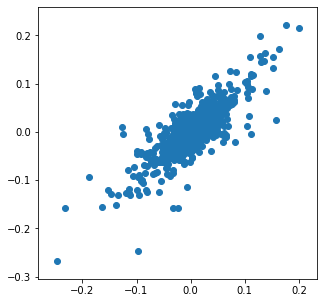

In [87]:
plt.figure(figsize=(5,5))
plt.scatter(brr, btc)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-pack

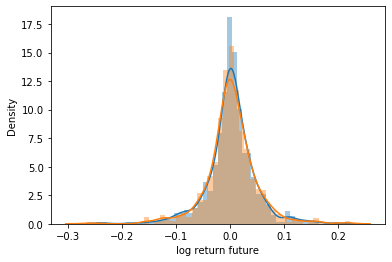

In [88]:
import seaborn as sns

sns.distplot(brr)
sns.distplot(btc)

In [89]:
from statsmodels.distributions.empirical_distribution import ECDF

(0, 1)

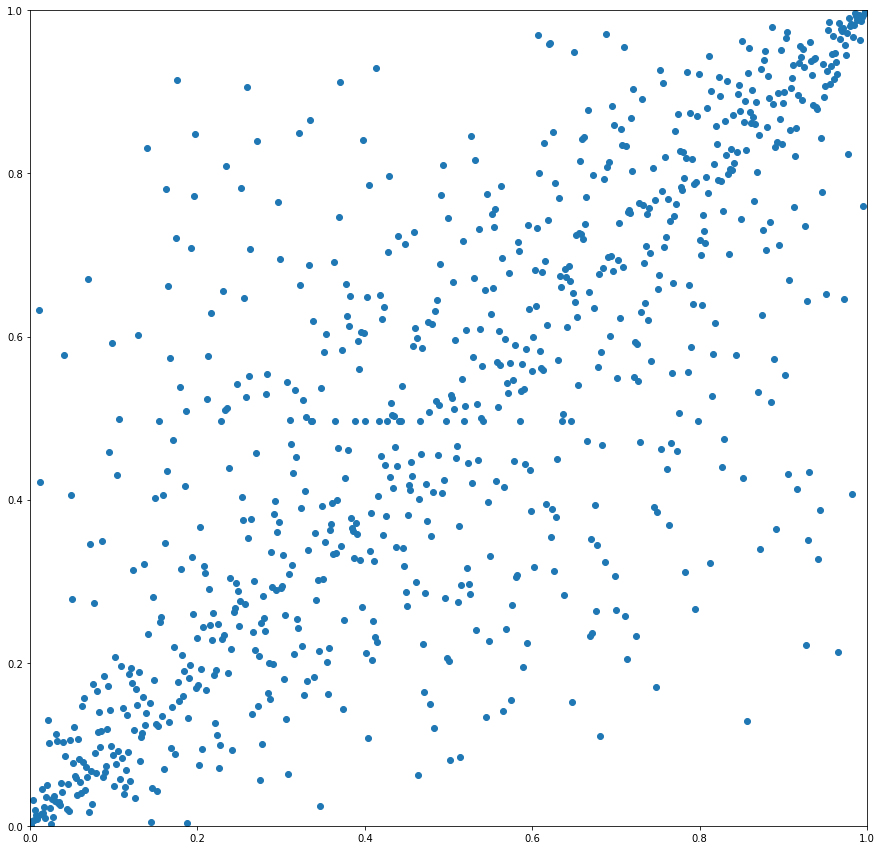

In [90]:
ecdf1 = ECDF(brr)
ecdf2 = ECDF(btc)

plt.figure(figsize=(15,15))
plt.scatter(ecdf1(brr), ecdf2(btc))
plt.xlim((0,1))
plt.ylim((0,1))

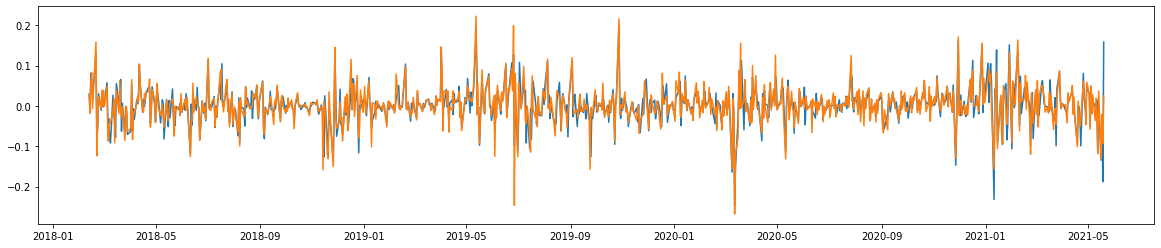

In [91]:
plt.figure(figsize=(20,4))
plt.plot(data.Date, brr)
plt.plot(data.Date, btc)

In [92]:
data.to_csv('../cleaned_data/btc_future_brr_new.csv')